# Py - RTTOV

[PDF Python Interface Guide - NWP/SAF](https://nwp-saf.eumetsat.int/site/download/documentation/rtm/docs_rttov12/rttov-wrapper.pdf)



In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import xarray

In [23]:
def compare_msu(re, ch, da, channel, rss_file, plot_color = 'blue',station_lat = 48.20, station_lon = 16.37, anomaly = False, anomaly_s = 1981, anomaly_e = 2011):
    
    dates = []
    for i in range(len(da)):
        dates.append(pd.to_datetime(str(da[i])[:4]+'-'+str(da[i])[4:]))

    rss = xarray.open_dataset(rss_file, decode_times=False)
    rss_vie = rss.sel(latitude = station_lat, longitude = station_lon, method='nearest')

    time = pd.to_datetime('1978-1-1 0:0:0')
    rss_dates = []
    for i in rss_vie.months.values:
        rss_dates.append(time + pd.DateOffset(months=i))
    
    if anomaly:
        mean = [0]*12
        count = [0]*12
        yrlist = [i for i in range(anomaly_s,anomaly_e + 1 )]
        for i in range(len(re)):
            if int(str(da[i])[:4]) in yrlist:
                if not isinstance(re[i], float):
                    for j in range(1,13):
                        if not np.isnan(re[i][0][channel]):
                            if j == int(str(da[i])[-2:]):
                                mean[j-1] += re[i][0][channel]
                                count[j-1] += 1
        for j in range(1,13):
            mean[j-1] = mean[j-1]/count[j-1]
        
        
    for i in range(len(re)):
        if not isinstance(re[i], float):
            if not np.isnan(re[i][0][0]):
                if anomaly:
                    for j in range(1,13):
                        if j == int(str(da[i])[-2:]):
                            re[i][0][channel] -= mean[j-1]

                else:
                    re[i][0][channel] -= 0

        else:
            re[i] = [[np.nan, np.nan, np.nan]]

    a = np.resize(re,(len(re),3))
    
    if anomaly:
        
        data = a[:,channel]
        data=data[np.logical_not(np.isnan(data))]
        x = np.arange(0,len(data))
        y=np.array(data)
        z = np.polyfit(x,y,1)
        print("RTTOV: {0}x + {1}".format(*z))
        
        data = rss_vie.brightness_temperature.values
        data=data[np.logical_not(np.isnan(data))]
        x = np.arange(0,len(data))
        y=np.array(data)
        z = np.polyfit(x,y,1)
        print("RSS: {0}x + {1}".format(*z))

    plt.rcParams['figure.figsize'] = [12, 8]

    fig, ax = plt.subplots()

    ax.grid()
    if anomaly:
        ax.set(xlabel='date', ylabel='reflectivity anomaly [K]',
           title='Anomaly MSU_'+str(channel + 2))
    else:
        ax.set(xlabel='date', ylabel='reflectivity [K]',
           title='MSU_'+str(channel + 2))
    ax.plot(dates, a[:,channel], color=plot_color, label='MSU_'+str(channel + 2), linewidth=4, alpha=0.8)
    ax.plot(rss_dates, rss_vie.brightness_temperature.values, color='black', label='RSS')
    ax.legend()

    fig.tight_layout(pad=2.0)
    plt.show()
    plt.close()

## Tag

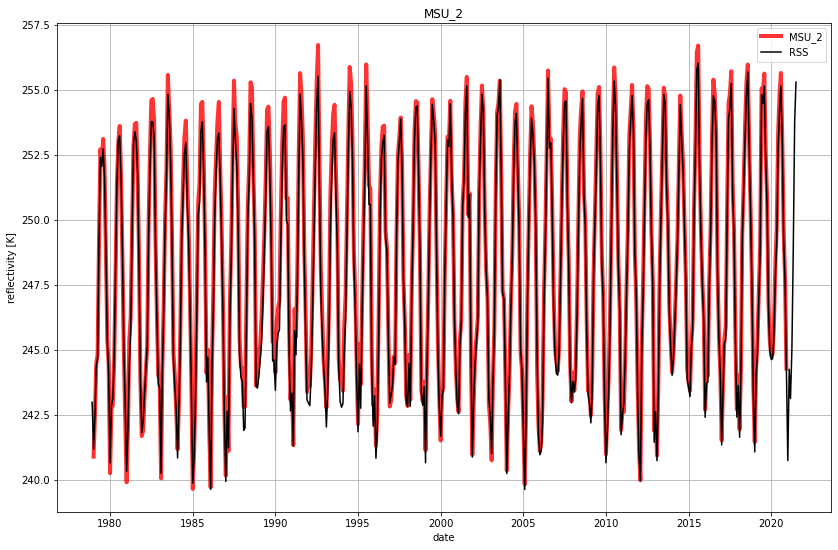

RTTOV: 0.0020872023742848013x + -0.43807445162518105
RSS: 0.0023494180738213104x + -0.2929156687524581


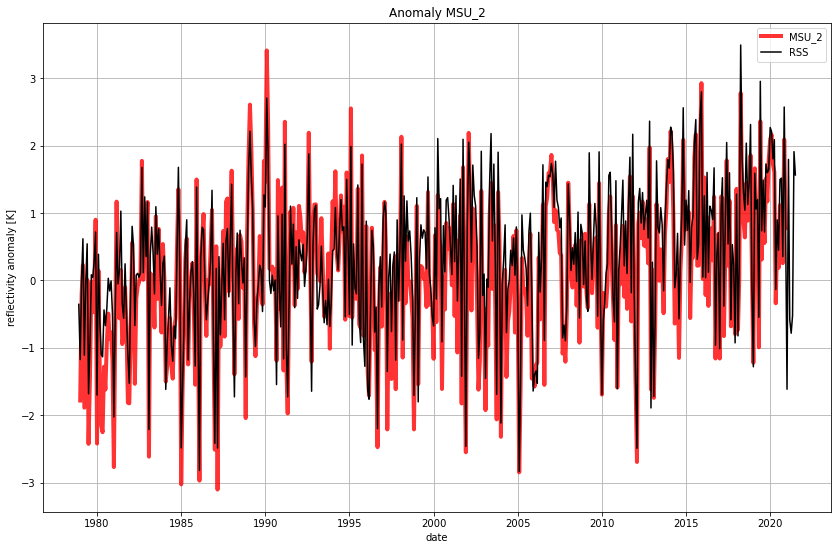

In [24]:
re = pickle.load( open( "./rttov_out_old/11035/11035_day_refl.p", "rb" ) )
ch = pickle.load( open( "./rttov_out_old/11035/11035_day_chan_list.p", "rb" ) )
da = pickle.load( open( "./rttov_out_old/11035/11035_day_dates.p", "rb" ) )
re_new = []
for i in re:
    if not isinstance(i, float):
        if isinstance(i, list):
            re_new.append(np.array([i]))
        else:
            re_new.append(np.array(i))
    else:
        re_new.append(np.array([np.array([np.nan, np.nan, np.nan])]))

compare_msu(re_new, ch, da, 0, './RSS_Tb_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=False )
compare_msu(re, ch, da, 0, './RSS_Tb_Anom_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=True )

## Nacht

In [26]:
re = pickle.load( open( "./rttov_out_old/11035/11035_night_refl.p", "rb" ) )
ch = pickle.load( open( "./rttov_out_old/11035/11035_night_chan_list.p", "rb" ) )
da = pickle.load( open( "./rttov_out-old/11035/11035_night_dates.p", "rb" ) )
re_new = []
for i in re:
    if not isinstance(i, float):
        if isinstance(i, list):
            re_new.append(np.array([i]))
        else:
            re_new.append(np.array(i))
    else:
        re_new.append(np.array([np.array([np.nan, np.nan, np.nan])]))

compare_msu(re_new, ch, da, 0, './RSS_Tb_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=False )
compare_msu(re, ch, da, 0, './RSS_Tb_Anom_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=True )

FileNotFoundError: [Errno 2] No such file or directory: './rttov_out-old/11035/11035_night_dates.p'